In [2]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,10))
import skimage
skimage.__version__
from skimage import metrics

# calculate various metrics for the reconstruction quality
def calculate_metrics(im, reco):
    mse = metrics.mean_squared_error(im, reco)
    ssim_score = metrics.structural_similarity(im, reco)
    hdist = metrics.hausdorff_distance(im, reco)
    return 'MSE: {mse:.2f}, SSIM {ssim:.2f}'.format(mse=mse, ssim=ssim_score)

# helper function to visualze reconstruction
def plot_reco(reco, k):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(reco,cmap='gray')
    ax.set_title('reco with ' + str(k)+ ' components')

im = imageio.imread("./m1-1_slice125.png")
im = im -im.min() / (im.max() - im.min())
u,s,vt = np.linalg.svd(im, full_matrices=False)
k = 170

<Figure size 1440x720 with 0 Axes>

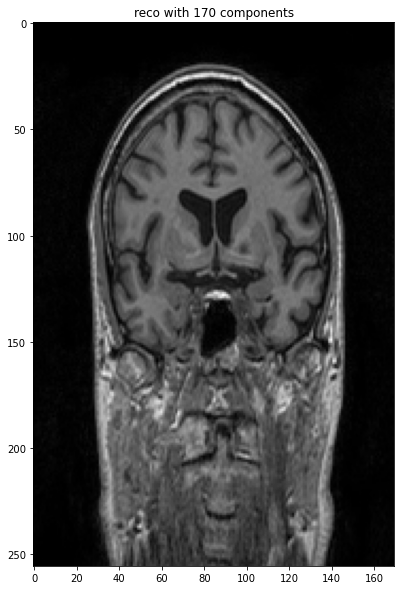

In [3]:
def reconstruct_svd_for_loops3(u,s,vt,k):
    """SVD reconstruction for k components using 3 for-loops
    for + in svd for zeile for spalte
    Inputs:
    u: (m,n) numpy array
    s: (n) numpy array (diagonal matrix)
    vt: (n,n) numpy array
    k: number of reconstructed singular components
    
    Ouput:
    (m,n) numpy array U_mk * S_k * V^T_nk for k reconstructed components
    """
    ### BEGIN SOLUTION
    reco = np.zeros(u.shape)
    for i in range(k): #for k components
        for j in range(u[:,i].shape[0]): #for each element in ith column of u
            for k in range(vt[i,:].shape[0]): #for each element in ith row of vt
                reco[j,k] += s[i] * u[j,i] * vt[i,k]
    return reco

plot_reco(reconstruct_svd_for_loops3(u,s,vt,k), k)

In [4]:
%%timeit
reconstruct_svd_for_loops3(u, s, vt, k)

5.82 s ± 45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
#!pip install cupy

^C


In [8]:
import cupy as cp

ModuleNotFoundError: No module named 'cupy'

In [9]:
im = imageio.imread("/kaggle/input/numpy-variance111/m1-1_slice125.png")
im = im -im.min() / (im.max() - im.min())
im = cp.asarray(im)
u,s,vt = cp.linalg.svd(im, full_matrices=False)
k = 20

def reconstruct_svd_for_loops3_cp(u,s,vt,k):
    """SVD reconstruction for k components using 3 for-loops
    for + in svd for zeile for spalte
    Inputs:
    u: (m,n) numpy array
    s: (n) numpy array (diagonal matrix)
    vt: (n,n) numpy array
    k: number of reconstructed singular components
    
    Ouput:
    (m,n) numpy array U_mk * S_k * V^T_nk for k reconstructed components
    """
    reco = cp.zeros(u.shape)
    print(reco.shape)
    for i in range(k): #for k components
        for j in range(u[:,i].shape[0]): #for each element in ith column of u
            for k in range(vt[i,:].shape[0]): #for each element in ith row of vt
                reco[j,k] += s[i] * (u[j,i] * vt[i,k])
    return reco

plot_reco(reconstruct_svd_for_loops3_cp(u,s,vt,k).get(), k)

FileNotFoundError: No such file: 'Z:\kaggle\input\numpy-variance111\m1-1_slice125.png'

In [35]:
%%timeit
reconstruct_svd_for_loops3_cp(u, s, vt, k)